In [20]:
import pandas as pd
filename = 'hechos-de-transito-reportados-por-ssc-base-ampliada-no-comparativa.csv'
data = pd.read_csv(filename, header=0)

print(data.shape)
data.head(10)
data.columns
data=data
data=data[data['AÑO_EVENTO']==2019]
print(data.shape)

(35042, 61)
(18014, 61)


In [21]:
def condition(data,replacement,stringu):
    if data.empty:
        pass
    else:
        data[data['MARCA DE VEHÍCULO 1'].str.contains(stringu, na=False)]=replacement 
        data[data['MARCA DE VEHÍCULO 2'].str.contains(stringu, na=False)]=replacement    
        data[data['MARCA DE VEHÍCULO 3'].str.contains(stringu, na=False)]=replacement    
        data[data['MARCA DE VEHÍCULO 4'].str.contains(stringu, na=False)]=replacement
    return data
data=data[data['AÑO_EVENTO']==2019]
#clean chevrolet
#data['MARCA DE VEHÍCULO 1'].fillna('')
#data['MARCA DE VEHÍCULO 2'].fillna('')
#data['MARCA DE VEHÍCULO 3'].fillna('')
#data['MARCA DE VEHÍCULO 4'].fillna('')
data=condition(data,'AVEO','CHEVROLET AVEO')
data=condition(data,'BEAT','CHEVROLET BEAT')

#clean nissan
data=condition(data,'TSURU', 'NISSAN TSURU')
data=condition(data,'JETTA','VW JETTA')
data=condition(data,'JETTA','JETTA VW')
data=condition(data,'VENTO','VOLKSWAGEN VENTO')
data=condition(data,'CHEVY','CHEVROLET CHEVY')
data=condition(data,'CHEVY','CHEVY CHEVROLET')
data=condition(data,'SENTRA','NISSAN SENTRA')
data=condition(data,'SPARK','CHEVROLET SPARK')
data=condition(data,'MARCH','NISSAN MARCH')

In [22]:
data_automovil1=data[data['TIPO DE VEHÍCULO 1']=='MOTOCICLETA']
data_automovil2=data[data['TIPO DE VEHÍCULO 2']=='MOTOCICLETA']
data_automovil3=data[data['TIPO DE VEHÍCULO 3']=='MOTOCICLETA']
data_automovil4=data[data['TIPO DE VEHÍCULO 4']=='MOTOCICLETA']

In [17]:
countv1=data_automovil1.groupby('MARCA DE VEHÍCULO 1')['MARCA DE VEHÍCULO 1'].count().to_frame()
countv2=data_automovil2.groupby('MARCA DE VEHÍCULO 2')['MARCA DE VEHÍCULO 2'].count().to_frame()
countv3=data_automovil3.groupby('MARCA DE VEHÍCULO 3')['MARCA DE VEHÍCULO 3'].count().to_frame()
countv4=data_automovil4.groupby('MARCA DE VEHÍCULO 4')['MARCA DE VEHÍCULO 4'].count().to_frame()

In [11]:
Allcar=countv1.join(countv2).join(countv3).join(countv4)
Allcar=Allcar.fillna(0)
Allcar["Total"]=Allcar.iloc[:,0]+Allcar.iloc[:,1]+Allcar.iloc[:,2]+Allcar.iloc[:,3]
Allcar=Allcar.sort_values(by = 'Total',ascending=False) 
Allcar.head(30)
Allcar_clean=Allcar.copy()
Allcar_clean=Allcar_clean.head(40)
Allcar_clean=Allcar_clean[:10]
Allcar_clean

,MARCA DE VEHÍCULO 1,MARCA DE VEHÍCULO 2,MARCA DE VEHÍCULO 3,MARCA DE VEHÍCULO 4,Total
MARCA DE VEHÍCULO 1,,,,,
ITALIKA,1696,872.0,20.0,6.0,2594.0
SD,1522,624.0,16.0,1.0,2163.0
YAMAHA,786,416.0,5.0,3.0,1210.0
HONDA,499,301.0,7.0,0.0,807.0
VENTO,286,164.0,3.0,0.0,453.0
PULSAR,228,123.0,0.0,0.0,351.0
SUZUKI,189,98.0,2.0,0.0,289.0
HARLEY DAVIDSON,60,30.0,2.0,0.0,92.0
CARABELA,49,37.0,0.0,0.0,86.0


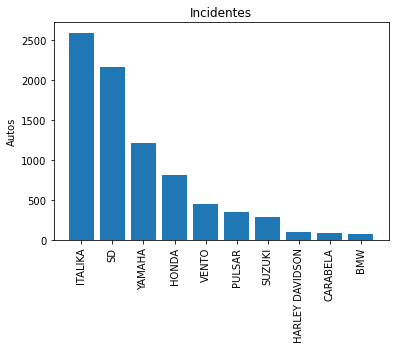

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#Definimos una lista con paises como string
Autos = Allcar_clean.index.values
#Definimos una lista con ventas como entero
Incidentes = Allcar_clean.Total

fig, ax = plt.subplots()
ax.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)
#Colocamos una etiqueta en el eje Y
ax.set_ylabel('Autos')
#Colocamos una etiqueta en el eje X
ax.set_title('Incidentes')
#Creamos la grafica de barras utilizando 'paises' como eje X y 'ventas' como eje y.
plt.xticks(rotation=90)
plt.bar(Autos, Incidentes)
plt.savefig('barras_simple.png')
#Finalmente mostramos la grafica con el metodo show()
plt.show()

In [43]:
countv1=data_automovil1.groupby(['MARCA DE VEHÍCULO 1','CONDICIÓN'])['MARCA DE VEHÍCULO 1'].count().unstack()[['LESIONADO', 'OCCISO']]
countv2=data_automovil2.groupby(['MARCA DE VEHÍCULO 2','CONDICIÓN'])['MARCA DE VEHÍCULO 2'].count().unstack()[['LESIONADO', 'OCCISO']]
countv3=data_automovil3.groupby(['MARCA DE VEHÍCULO 3','CONDICIÓN'])['MARCA DE VEHÍCULO 3'].count().unstack()[['LESIONADO']]
countv4=data_automovil4.groupby(['MARCA DE VEHÍCULO 4','CONDICIÓN'])['MARCA DE VEHÍCULO 4'].count().unstack()[['LESIONADO']]
countv1=countv1.fillna(0)
countv2=countv2.fillna(0)
countv3=countv3.fillna(0)
countv4=countv4.fillna(0)
countv1= countv1.rename(columns={'LESIONADO': 'LESIONADO1','OCCISO':'OCCISO1'})
countv2= countv2.rename(columns={'LESIONADO': 'LESIONADO2','OCCISO':'OCCISO2'})
countv3= countv3.rename(columns={'LESIONADO': 'LESIONADO3'})
countv4= countv4.rename(columns={'LESIONADO': 'LESIONADO4'})

In [49]:
Allcar=countv1.join(countv2).join(countv3).join(countv4)
Allcar=Allcar.fillna(0)
Allcar['TotLesionado']=Allcar['LESIONADO1']+Allcar['LESIONADO2']+Allcar['LESIONADO3']+Allcar['LESIONADO4']
Allcar['TotOcciso']=Allcar['OCCISO1']+Allcar['OCCISO2']
Allcar['Total']=Allcar['TotLesionado']+Allcar['TotOcciso']
Allcar=Allcar.sort_values(by = 'TotLesionado',ascending=False) 
Allcar=Allcar.sort_values(by = 'Total',ascending=False) 
Allcar_clean=Allcar.copy()
#Allcar_clean=Allcar_clean.drop(['SD','HONDA','MAZDA','NISSAN','TOYOTA','FORD','CHEVROLET','IBIZA','RENAULT'])
Allcar_clean=Allcar_clean[:50]
Allcar_clean

CONDICIÓN,LESIONADO1,OCCISO1,LESIONADO2,OCCISO2,LESIONADO3,LESIONADO4,TotLesionado,TotOcciso,Total
MARCA DE VEHÍCULO 1,,,,,,,,,
ITALIKA,1662.0,34.0,866.0,6.0,20.0,6.0,2554.0,40.0,2594.0
SD,1511.0,11.0,621.0,3.0,16.0,1.0,2149.0,14.0,2163.0
YAMAHA,775.0,11.0,414.0,2.0,5.0,3.0,1197.0,13.0,1210.0
HONDA,496.0,3.0,299.0,2.0,7.0,0.0,802.0,5.0,807.0
VENTO,280.0,6.0,163.0,1.0,3.0,0.0,446.0,7.0,453.0
PULSAR,222.0,6.0,122.0,1.0,0.0,0.0,344.0,7.0,351.0
SUZUKI,185.0,4.0,98.0,0.0,2.0,0.0,285.0,4.0,289.0
HARLEY DAVIDSON,58.0,2.0,30.0,0.0,2.0,0.0,90.0,2.0,92.0
CARABELA,49.0,0.0,37.0,0.0,0.0,0.0,86.0,0.0,86.0


In [50]:
import pandas as pd
filename = 'hechos-de-transito-reportados-por-ssc-base-ampliada-no-comparativa.csv'
data = pd.read_csv(filename, header=0)

print(data.shape)
data.head(10)
data.columns
data=data
data=data[data['AÑO_EVENTO']==2019]
print(data.shape)

(35042, 61)
(18014, 61)


In [55]:
data=data[((data['TIPO DE VEHÍCULO 1']=='MOTOCICLETA')|(data['TIPO DE VEHÍCULO 2']=='MOTOCICLETA')|(data['TIPO DE VEHÍCULO 3']=='MOTOCICLETA')|(data['TIPO DE VEHÍCULO 4']=='MOTOCICLETA'))]
data.groupby(['TIPO DE EVENTO','CONDICIÓN']).count()

No. FOLIO  FECHA EVENTO  AÑO_EVENTO  MES_EVENTO  \
TIPO DE EVENTO    CONDICIÓN                                                    
ATROPELLADO       LESIONADO        593           593         593         593   
                  OCCISO             6             6           6           6   
CAIDA DE PASAJERO LESIONADO          2             2           2           2   
CHOQUE            LESIONADO       4243          4243        4243        4243   
                  OCCISO            56            56          56          56   
DERRAPADO         LESIONADO       3608          3608        3608        3608   
                  OCCISO            48            48          48          48   
VOLCADURA         LESIONADO          2             2           2           2   

                             HORA_EVENTO  COORDENADA X  COORDENADA Y  PUNTO 1  \
TIPO DE EVENTO    CONDICIÓN                                                     
ATROPELLADO       LESIONADO          593           593           593      593   
                  OCCISO               6             6             6        6   
CAIDA DE PASAJERO LESIONADO            2             2             2        2   
CHOQUE            LESIONADO         4243          4243          4243     4243   
                  OCCISO              56            56            56       56   
DERRAPADO         LESIONADO         3608          3608          3608     3608   
                  OCCISO              48            48            48       48   
VOLCADURA         LESIONADO            2             2             2        2   

                             PUNTO 2  COLONIA  ...  IDENTIDAD  \
TIPO DE EVENTO    CONDICIÓN                    ...              
ATROPELLADO       LESIONADO      593      593  ...        593   
                  OCCISO           6        6  ...          6   
CAIDA DE PASAJERO LESIONADO        2        2  ...          2   
CHOQUE            LESIONADO     4243     4243  ...       4243   
                  OCCISO          56       56  ...         56   
DERRAPADO         LESIONADO     3608     3608  ...       3608   
                  OCCISO          48       48  ...         48   
VOLCADURA         LESIONADO        2        2  ...          2   

                             UNIDAD MEDICA DE APOYO  LUGAR DEL DECESO  \
TIPO DE EVENTO    CONDICIÓN                                             
ATROPELLADO       LESIONADO                     593                 0   
                  OCCISO                          6                 6   
CAIDA DE PASAJERO LESIONADO                       2                 0   
CHOQUE            LESIONADO                    4243                 0   
                  OCCISO                         56                56   
DERRAPADO         LESIONADO                    3608                 0   
                  OCCISO                         48                48   
VOLCADURA         LESIONADO                       2                 0   

                             TRASLADADO(S) LESIONADO  HOSPITAL  DIA_EVENTO  \
TIPO DE EVENTO    CONDICIÓN                                                  
ATROPELLADO       LESIONADO                      593       218         593   
                  OCCISO                           6         1           6   
CAIDA DE PASAJERO LESIONADO                        2         2           2   
CHOQUE            LESIONADO                     4243      1093        4243   
                  OCCISO                          56        10          56   
DERRAPADO         LESIONADO                     3608      1200        3608   
                  OCCISO                          48         5          48   
VOLCADURA         LESIONADO                        2         0           2   

                             HORA2  PRIORIDAD  OBSERVACIONES  coordenada  
TIPO DE EVENTO    CONDICIÓN                                               
ATROPELLADO       LESIONADO    593        593              8         593  
                  OCCISO     